# CEE 598: Uncertainty Quantification
## Assignment One
### Noah Garfinkle (garfink2@illinois edu)
### 06 February 2020

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Problem 1.

In [12]:
results = []
ns = np.linspace(0.1,1000,100)
f = lambda x: n*np.power(1-x,n-1)
for n in ns:
    result = round(quad(f,0,1)[0],2)
    results.append(result)

In [15]:
# for fixed n
singleResults = []
n = 100
xs = np.linspace(0.1,1,100)
for x in xs:
    singleResult = f(x)
    singleResults.append(singleResult)

Text(0, 0.5, 'integral of n(1-x)^(n-1) from 0<=x<=1')

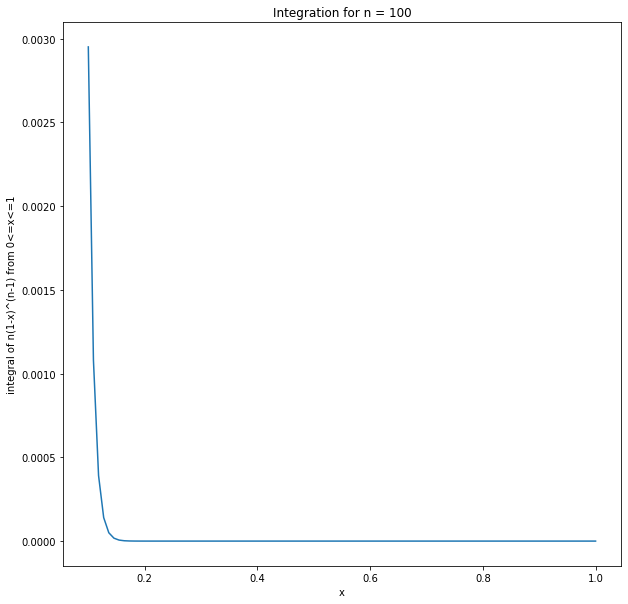

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(xs,singleResults)
ax.set_title(f"Integration for n = {n}")
ax.set_xlabel("x")
ax.set_ylabel("integral of n(1-x)^(n-1) from 0<=x<=1")

Text(0, 0.5, 'integral of n(1-x)^(n-1) from 0<=x<=1')

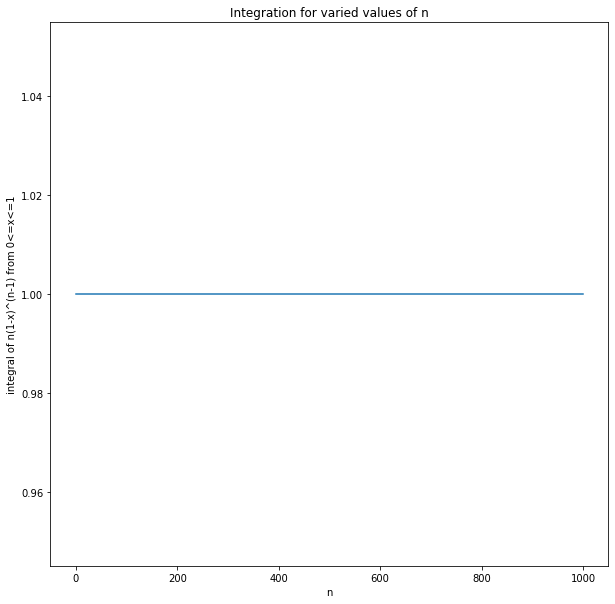

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(ns,results)
ax.set_title("Integration for varied values of n")
ax.set_xlabel("n")
ax.set_ylabel("integral of n(1-x)^(n-1) from 0<=x<=1")

## Problem 2.

In [18]:
def pdf(x):
    if x < 4:
        return 0
    elif 4 <= x < 5:
        return 0.4
    elif 5 <= x < 6:
        return 0.3
    elif 6 <= x < 7:
        return 0.3
    elif x > 7:
        return 0

In [38]:
pdf_result = []
currentProb = 0.0
cumulativeProb = []
for x in np.linspace(0,10,1000):
    res = pdf(x)
    currentProb += res
    cumulativeProb.append(currentProb)
    pdf_result.append(res)

Text(0.5, 0, 'x')

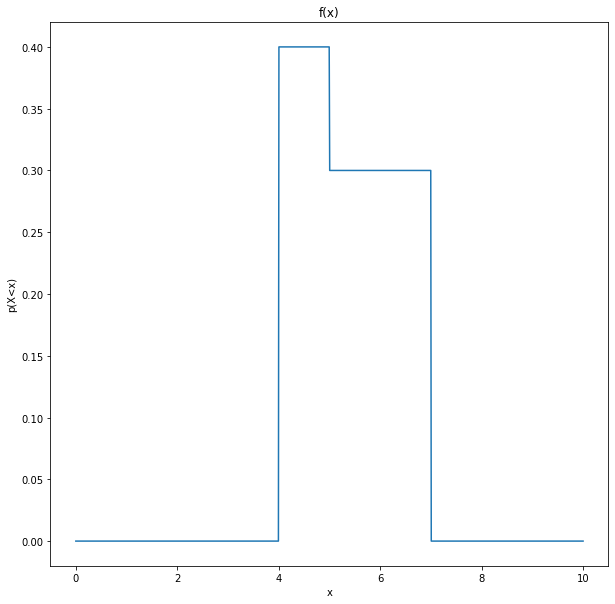

In [26]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("f(x)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")

## 2a

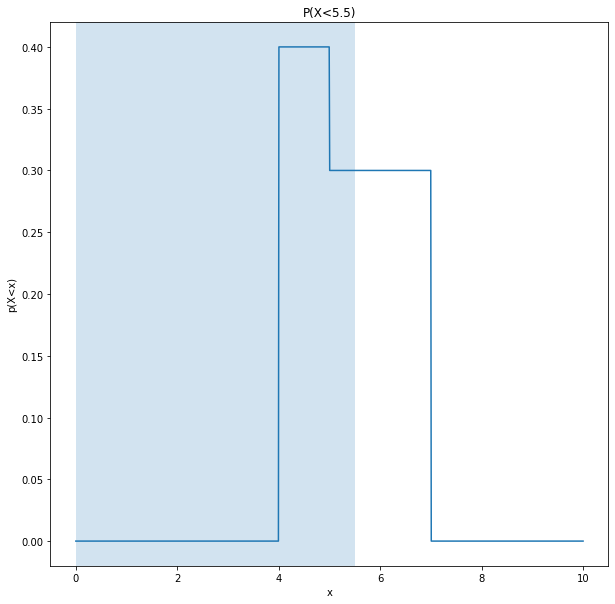

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("P(X<5.5)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")
ax.axvspan(0,5.5,alpha=0.2)

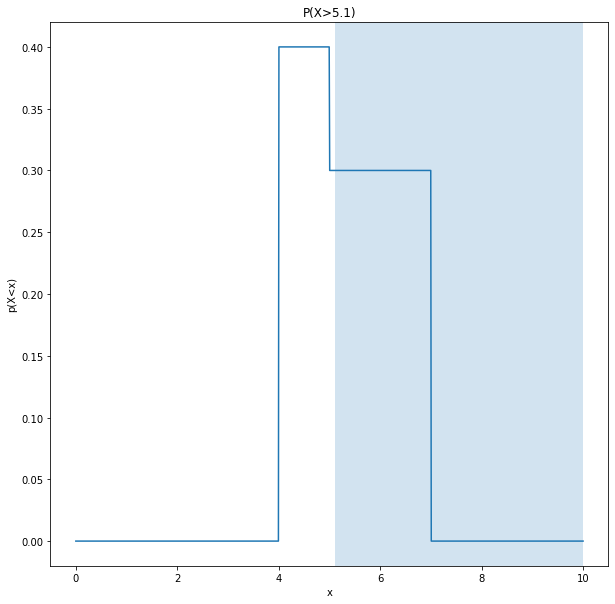

In [35]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("P(X>5.1)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")
ax.axvspan(5.1,10,alpha=0.2)

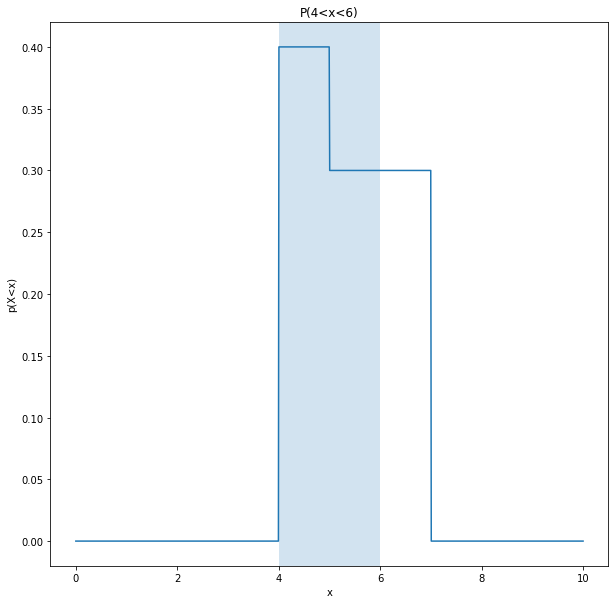

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),pdf_result)
ax.set_title("P(4<x<6)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")
ax.axvspan(4,6,alpha=0.2)

## 2b

Text(0.5, 0, 'x')

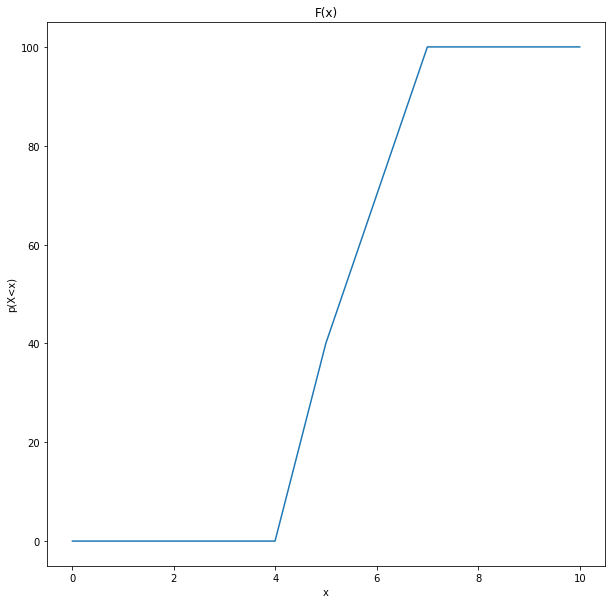

In [39]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.linspace(0,10,1000),cumulativeProb)
ax.set_title("F(x)")
ax.set_ylabel("p(X<x)")
ax.set_xlabel("x")

## Problem 3 part d

In [72]:
def fxy(x,y):
    if x <= 0 or y <= 0:
        return 0
    else:
        toReturn = 6 * np.power(np.math.e,-x)*np.power(np.math.e,-2*y)
        return toReturn

In [73]:
def fx(x,y):
    toReturn = -3 * np.power(np.math.e,-x-2*y)
    return toReturn

In [74]:
def fy(x,y):
    toReturn = -6 * np.power(np.math.e,-x-2*y)
    return toReturn

In [75]:
xs = ys = np.linspace(0,10,100)

In [76]:
xarr = []
yarr = []
pdfarr = []
fxarr = []
fyarr = []
for x in xs:
    for y in ys:
        xarr.append(x)
        yarr.append(y)
        p = fxy(x,y)
        pdfarr.append(p)
        fxarr.append(fx(x,y))
        fyarr.append(fy(x,y))
df = pd.DataFrame({"x":xarr,"y":yarr,"p":pdfarr,"fx":fxarr,"fy":fyarr})

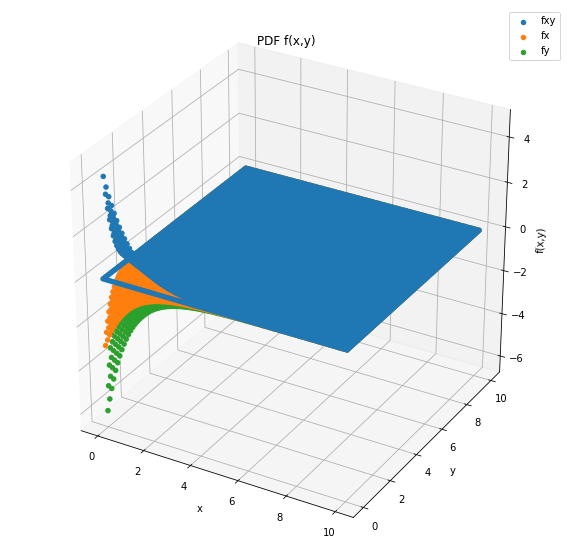

In [84]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("PDF f(x,y)")
ax.scatter(df["x"],df["y"],df["p"],alpha=1,label="fxy")
ax.scatter(df["x"],df["y"],df["fx"],alpha=1,label="fx")
ax.scatter(df["x"],df["y"],df["fy"],alpha=1,label="fy")
ax.legend()